In [3]:
### Basic Setup

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import dependencies.knn_impute

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def null_cnt(col):
    return col.isnull().sum()

def null_pct(col):
    return null_cnt(col) / len(col)

In [3]:
train = pd.read_csv('../Kaggle_Info/train.csv')
train.set_index('Id', inplace=True)
test = pd.read_csv('../Kaggle_Info/test.csv')
test.set_index('Id', inplace=True)
train_sale_price = train.pop('SalePrice')
research = pd.concat([train, test])
research.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
research.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
### Drop columns with uninformative data and leaking info
unwanted_cols = ['SaleType', 'SaleCondition']
research.drop(unwanted_cols, axis=1, inplace=True)
research.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008


In [ ]:
['MSSubClass', 'MSZoning', '']

In [6]:
null_cnts = research.apply(null_cnt)
null_cnts = null_cnts[null_cnts != 0].sort_values(ascending=False)
null_cnts

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [7]:
pool_cols = [col for col in research.columns if 'Pool' in col]
research[pool_cols].apply(null_cnt).sort_values(ascending=False)

PoolQC      2909
PoolArea       0
dtype: int64

In [8]:
research.loc[research['PoolQC'].isnull(), pool_cols].head()

,PoolArea,PoolQC
Id,,
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN


In [9]:
pool_qc_null = research['PoolQC'].isnull()
pool_are_zero = research['PoolArea'] == 0
research[pool_qc_null & ~pool_are_zero][pool_cols]

,PoolArea,PoolQC
Id,,
2421,368,NaN
2504,444,NaN
2600,561,NaN


In [10]:
research.loc[pool_qc_null & pool_are_zero, 'PoolQC'] = 'NA'
research.loc[pool_qc_null & ~pool_are_zero, 'PoolQC'] = train['PoolQC'].mode().iloc[0]
(null_cnt(research['PoolQC']), train['PoolQC'].mode().iloc[0])

(0, 'Gd')

In [11]:
misc_cols = [col for col in research.columns if 'Misc' in col]
research[misc_cols].apply(null_cnt).sort_values(ascending=False)

MiscFeature    2814
MiscVal           0
dtype: int64

In [12]:
research.loc[research['MiscFeature'].isnull(), misc_cols].head()

,MiscFeature,MiscVal
Id,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0


In [13]:
misc_feature_null = research['MiscFeature'].isnull()
misc_val_zero = research['MiscVal'] == 0
research[misc_feature_null & ~misc_val_zero][misc_cols]

,MiscFeature,MiscVal
Id,,
2550,NaN,17000


In [14]:
research.loc[misc_feature_null & misc_val_zero, 'MiscFeature'] = 'NA'
research.loc[misc_feature_null & ~misc_val_zero, 'MiscFeature'] = train['MiscFeature'].mode().iloc[0]
(null_cnt(research['MiscFeature']), train['MiscFeature'].mode().iloc[0])

(0, 'Shed')

In [15]:
research['Alley'] = research['Alley'].fillna('NA')
research['Fence'] = research['Fence'].fillna('NA')

In [16]:
frp_cols = [col for col in research.columns if 'Fireplace' in col]
research.loc[research['FireplaceQu'].isnull(), frp_cols].head()

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
6,0,NaN
11,0,NaN
13,0,NaN
16,0,NaN


In [17]:
frp_qu_null = research['FireplaceQu'].isnull()
frps_zero = research['Fireplaces'] == 0
research[frp_qu_null & ~frps_zero][frp_cols]

,Fireplaces,FireplaceQu
Id,,


In [18]:
research['FireplaceQu'] = research['FireplaceQu'].fillna('NA')
null_cnt(research['FireplaceQu'])

0

In [19]:
bsmt_cols = [col for col in research.columns if 'Bsmt' in col]
research[bsmt_cols].apply(null_cnt)

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1       1
BsmtFinType2    80
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [20]:
bsmt_null_df = research.loc[research['BsmtQual'].isnull(), bsmt_cols]
bsmt_null_df.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [21]:
bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
research.loc[bsmt_null_df.index, bsmt_cat_cols] = research.loc[bsmt_null_df.index, bsmt_cat_cols].fillna('NA')
research[bsmt_cols].apply(null_cnt)

BsmtQual        0
BsmtCond        3
BsmtExposure    3
BsmtFinType1    0
BsmtFinSF1      1
BsmtFinType2    1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [22]:
research.loc[research['BsmtExposure'].isnull(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [23]:
research.loc[research['BsmtCond'].isnull(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [24]:
research.loc[research['BsmtFinType2'].isnull(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [25]:
research.loc[research['BsmtExposure'].isnull(), 'BsmtExposure'] = research['BsmtExposure'].mode().iloc[0]
research.loc[research['BsmtCond'].isnull(), 'BsmtCond'] = research['BsmtCond'].mode().iloc[0]
research.loc[research['BsmtFinType2'].isnull(), 'BsmtFinType2'] = research['BsmtFinType2'].mode().iloc[0]
(research['BsmtExposure'].mode().iloc[0], research['BsmtCond'].mode().iloc[0], research['BsmtFinType2'].mode().iloc[0])

('No', 'TA', 'Unf')

In [26]:
research[bsmt_cols].apply(null_cnt)

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      1
BsmtFinType2    0
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [27]:
research.loc[research['BsmtFinSF1'].isnull(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN


In [28]:
research.loc[
    2121, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
] = 0

In [29]:
research.loc[research['BsmtFullBath'].isnull(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2189,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN


In [30]:
research.loc[
    2189, ['BsmtFullBath', 'BsmtHalfBath']
] = 0

In [31]:
research[bsmt_cols].apply(null_cnt)

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [32]:
research.loc[research['Electrical'].isnull(), 'Electrical'] = research['Electrical'].mode().iloc[0]
research['Electrical'].mode().iloc[0]

'SBrkr'

In [33]:
lot_cols = [col for col in research.columns if 'Lot' in col]
research[lot_cols].apply(null_cnt).sort_values(ascending=False)

LotFrontage    486
LotConfig        0
LotShape         0
LotArea          0
dtype: int64

In [34]:
research.loc[research['LotFrontage'].isnull(), lot_cols].head()

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,NaN,10382,IR1,Corner
13,NaN,12968,IR2,Inside
15,NaN,10920,IR1,Corner
17,NaN,11241,IR1,CulDSac
25,NaN,8246,IR1,Inside


In [35]:
research['LotFrontage'] = research['LotFrontage'].fillna(0)
null_cnt(research['LotFrontage'])

0

In [36]:
grg_cols = [col for col in research.columns if 'Garage' in col]
research[grg_cols].apply(null_cnt).sort_values(ascending=False)

GarageCond      159
GarageQual      159
GarageFinish    159
GarageYrBlt     159
GarageType      157
GarageArea        1
GarageCars        1
dtype: int64

In [37]:
research.loc[research['GarageType'].isnull(), grg_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
90,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [38]:
grg_null_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
grg_any_null_df = research.loc[research[grg_null_cols].isnull().any(axis=1), grg_null_cols]
grg_cols_all_null = grg_any_null_df.isnull().all(axis=1)
grg_any_null_df[~grg_cols_all_null]
len(grg_cols_all_null)

159

/home/vasiliy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vasiliy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


0.0

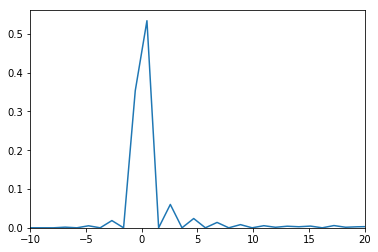

In [39]:
garage_built_interval = train['GarageYrBlt'] - train['YearBuilt']
ax = sns.kdeplot(garage_built_interval)
ax.set_xlim(-10, 20)
garage_built_interval.median()

In [40]:
grg_all_null_df = grg_any_null_df[grg_cols_all_null]
grg_not_all_null_df = grg_any_null_df[~grg_cols_all_null]
grg_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

research.loc[grg_all_null_df.index, grg_cat_cols] = research.loc[grg_all_null_df.index, grg_cat_cols].fillna('NA')
research.loc[grg_all_null_df.index,'GarageYrBlt'] = research.loc[grg_all_null_df.index, 'GarageYrBlt'].fillna(0)

research.loc[grg_not_all_null_df.index, grg_cat_cols] = (research.loc[grg_not_all_null_df.index, grg_cat_cols].
                                                         fillna(train[grg_cat_cols].mode().iloc[0]))
research.loc[grg_not_all_null_df.index,'GarageYrBlt'] = (research.loc[grg_not_all_null_df.index, 'GarageYrBlt'].
                                                         fillna(research.loc[grg_not_all_null_df.index, 'YearBuilt']))

research[grg_cols].apply(null_cnt).sort_values(ascending=False)

GarageArea      1
GarageCars      1
GarageCond      0
GarageQual      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64

In [41]:
research.loc[research['GarageArea'].isnull(), grg_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,1923.0,Unf,NaN,NaN,TA,TA


In [42]:
research.loc[research['GarageArea'].isnull(), 'GarageArea'] = train['GarageArea'].mean()
research.loc[research['GarageCars'].isnull(), 'GarageCars'] = train['GarageCars'].median()
research[grg_cols].apply(null_cnt).sort_values(ascending=False)

GarageCond      0
GarageQual      0
GarageArea      0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64

In [43]:
mas_cols = [col for col in research.columns if 'Mas' in col]
research[mas_cols].apply(null_cnt).sort_values(ascending=False)

MasVnrType    24
MasVnrArea    23
dtype: int64

In [44]:
research.loc[research['MasVnrArea'].isnull(), mas_cols].head()

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN


In [45]:
mas_type_null = research['MasVnrType'].isnull()
mas_area_null = research['MasVnrArea'].isnull()
research[mas_type_null & ~mas_area_null][mas_cols]

,MasVnrType,MasVnrArea
Id,,
2611,NaN,198.0


In [46]:
research.loc[mas_type_null & mas_area_null, 'MasVnrType'] = 'None'
research.loc[mas_type_null & mas_area_null, 'MasVnrArea'] = 0

research.loc[mas_type_null & ~mas_area_null, 'MasVnrType'] = train['MasVnrType'].mode().iloc[0]
research[mas_cols].apply(null_cnt).sort_values(ascending=False)

MasVnrArea    0
MasVnrType    0
dtype: int64

In [47]:
other_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
research[other_cols] = research[other_cols].fillna(
    train[other_cols].mode().iloc[0]
)

In [49]:
null_research = research.apply(null_cnt)
null_research[null_research != 0]

Series([], dtype: int64)

In [50]:
cleaned_train = pd.concat([research.loc[train.index], train_sale_price], axis=1)
cleaned_test = research.loc[test.index]

len(cleaned_train) == len(train), len(cleaned_test) == len(test)

(True, True)

In [51]:
cleaned_train.to_csv('cleaned_data/train.csv')
cleaned_test.to_csv('cleaned_data/test.csv')